In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [37]:
def gen_data(rows, cols):

    X = np.random.randn(rows, cols)

    t_coff = np.random.randn(cols)
    t_coff[2:5] = 0

    noise = np.random.randn(rows) * 0.5
    y = np.dot(X, t_coff) + noise

    df = pd.DataFrame(X, columns = [f'feature_{i+1}' for i in range(cols)])
    df['target'] = y
    
    x = df.drop("target", axis = 1)
    Y   = df["target"]
    
    return x, Y

In [52]:
def train_test_split(x, y, test_size):
    np.random.seed(10)
    
    rows = x.shape[0]
    test = int(rows * test_size)
    test_index = np.random.choice(rows, test, replace = False)
    
    dublicate = np.zeros(rows, dtype= bool)
    dublicate[test_index] = True
    
    X_train = x[~dublicate]
    X_test = x[dublicate]
    y_train = y[~dublicate].reset_index(drop = True)
    y_test = y[dublicate].reset_index(drop = True)
    
    return X_train,X_test,y_train,y_test


In [66]:
class ElasticNet: 
    def __init__(self, 
                 alpha=1.0, 
                 l_ratio=0.5,
                 learning_rate = 0.0005,
                 iterations = 1000):
        self.alpha = alpha
        self.l_ratio = l_ratio
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        
    
    def l1_penalty(self):
        l1_penalty  = self.l_ratio * np.sign(self.weights)
        return l1_penalty
    
    def l2_penalty(self):
        l2_penalty  = (1 - self.l_ratio) * self.weights
        return l2_penalty

    def lin_reg_model(self, X_test):
        return np.dot(X_test, self.weights) + self.bias
            
    def fit(self, X_train, y_train):
        # X = X_train.to_numpy()
        # y = y_train.to_numpy()
        rows, cols = X_train.shape
        self.weights = np.zeros(cols)
        
        # self.intercept = 0
        
        # feature_conbination_X = X_train.T.dot(X_train)
        # feature_conbination_y = X_train.T.dot(y_train)
        
        for i in range(self.iterations):
            y_pred = self.lin_reg_model(X_train)
            residuals = y_pred- y_train
            
            gradients_w = (1 / rows) * np.dot(X_train.T, residuals)
            gradients_b = (1 / rows) * np.sum(residuals)
            
            self.weights -= self.learning_rate *(gradients_w + self.alpha *(self.l1_penalty()+ self.l2_penalty()))
            self.bias -= self.learning_rate *gradients_b
            
            if i % 1000 == 0:
                loss = (1/rows) *np.sum((y_train - y_pred)** 2) 
                print(f"Iteration {i}, Loss: {loss}")
    
    def predict(self,X_test):
        return self.lin_reg_model(X_test)     

In [56]:
def standardize(X_train, X_test):
    mean = X_train.mean()
    std = X_train.std()
    X_train_std = (X_train - mean)/std
    X_test_std = (X_test - mean)/std
    return X_train_std, X_test_std

In [50]:
X, y = gen_data(1000, 10)

# df = pd.read_csv("")

# X = df.drop("target", axis=1)
# y = df[target]

X.shape, y.shape

((1000, 10), (1000,))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

In [57]:
X_train_std, X_test_std = standardize(X_train, X_test)

X_train_std.shape, X_test_std.shape

((800, 10), (200, 10))

In [63]:
model = ElasticNet(alpha = 0.01,
                   l_ratio = 0.2,
                   learning_rate =0.0005,
                   iterations= 10000)

model.fit(X_train_std.values, y_train.values)

Iteration 0, Loss: 11.785547380647433
Iteration 1000, Loss: 4.882454500497916
Iteration 2000, Loss: 2.128967616041598
Iteration 3000, Loss: 1.0202366872819097
Iteration 4000, Loss: 0.5688445653390973
Iteration 5000, Loss: 0.3825635784381496
Iteration 6000, Loss: 0.3043410274821076
Iteration 7000, Loss: 0.2707447200187589
Iteration 8000, Loss: 0.2558997910412276
Iteration 9000, Loss: 0.24908014538835105


In [67]:
y_pred =  model.predict(X_test_std.values)

In [68]:
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error on Test Set : {mse}")

Mean Squared Error on Test Set : 0.269392645589893


In [70]:
print("Learned Weights:", model.weights)
print("Learned Bias:", model.bias)

comparison_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': y_pred
})

comparison_df.head(20)

Learned Weights: [ 0.15523119  1.31573842  0.01273775  0.01404976  0.00763343  0.6889651
 -2.38218345  1.6852422   0.9152097  -0.74469009]
Learned Bias: 0.08460285521534855


,Actual Values,Predicted Values
0,2.823536,2.609294
1,3.857528,4.077804
2,2.055015,1.786003
3,-3.720632,-4.046761
4,9.712813,8.524397
5,7.192971,7.304347
6,-0.510573,-0.794340
7,0.238805,1.145479
8,-2.925036,-2.684333
9,1.876611,1.287951


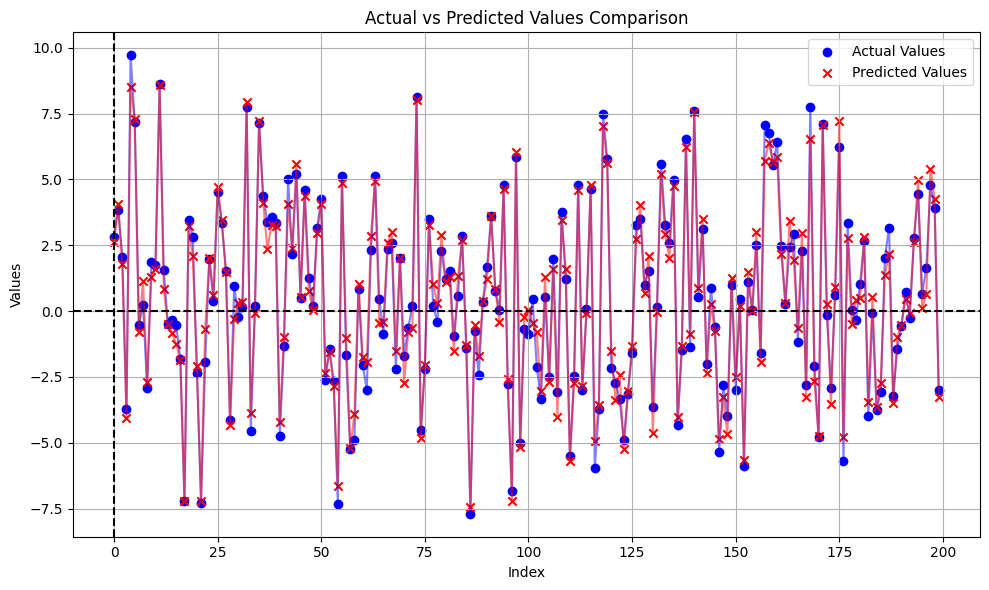

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df.index, comparison_df['Actual Values'], color='blue', label='Actual Values', marker='o')
plt.scatter(comparison_df.index, comparison_df['Predicted Values'], color='red', label='Predicted Values', marker='x')
plt.plot(comparison_df.index, comparison_df['Actual Values'], color='blue', alpha=0.5)
plt.plot(comparison_df.index, comparison_df['Predicted Values'], color='red', alpha=0.5)

plt.title('Actual vs Predicted Values Comparison')
plt.xlabel('Index')
plt.ylabel('Values')
plt.axhline(0, color='black', linewidth=1.5, ls='--')
plt.axvline(0, color='black', linewidth=1.5, ls='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()